Problem 1 - 4: Stream Measurements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("lab3_excel.xlsx")

In [2]:
new_df = pd.DataFrame()

new_df['Xm'] = (np.array(df['x (m)'].iloc[1:])+np.array(df['x (m)'].iloc[:-1]))/2
new_df['A'] = np.array(new_df['Xm'])*np.array(df['d (m)'].iloc[1:])
new_df['V'] = (np.array(df['v (m/s)'].iloc[1:])+np.array(df['v (m/s)'].iloc[:-1]))/2
new_df['Q'] = new_df['V']*new_df['A']

In [3]:
new_df

,Xm,A,V,Q
0,0.2,0.042,0.210,0.00882
1,0.6,0.240,0.430,0.10320
2,1.0,0.660,0.550,0.36300
3,1.4,0.980,0.635,0.62230
4,1.8,1.188,0.615,0.73062
5,2.2,1.430,0.590,0.84370
6,2.6,1.612,0.725,1.16870
7,3.0,1.650,0.865,1.42725
8,3.4,1.802,0.770,1.38754
9,3.8,1.710,0.665,1.13715


In [4]:
print('total streamflow ', new_df['Q'].sum(), 'cubic meters per second')

total streamflow  8.37692 cubic meters per second


Problem 5: Plot of Depth vs Distance across Stream

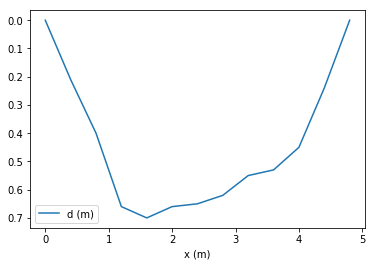

In [5]:
df.plot(x='x (m)', y='d (m)')
plt.gca().invert_yaxis()

Problem 6: Discharge vs Distance

Text(2.05,1.5,'local max')

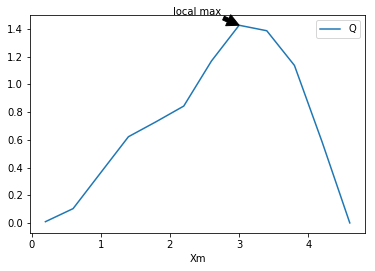

In [6]:
ax = new_df.plot(x='Xm', y='Q')
ymax = max(new_df['Q'])
xpos = list(new_df['Q']).index(ymax)
xmax = new_df['Xm'][xpos]

ax.annotate('local max', xy=(xmax, ymax), xytext=(2.05, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.9),
            )

Part 2: Baseflow seperation 6-11

In [7]:
xlsx = pd.ExcelFile("lab3_excel.xlsx")

column_names = xlsx.parse(sheet_name='Sheet2').columns
isotopes = xlsx.parse(sheet_name='Sheet2', skiprows = 1)
isotopes.columns = column_names

isotopes['t'] = list(range(1,12))

print('6. Time to peak discharge is: 4 hours')

6. Time to peak discharge is: 4 hours


discharge in mm/hour, summed over the interval

In [8]:
total_Q_mm_10hr = (isotopes['Q (m3/s)']*1000000000*60*60).sum()

cumulative rainfall in the watershed, summed over the interval

In [9]:
total_P_mm_10hr = 35*(15*1000*1000*1000*1000)

In [10]:
print('7. total runoff ratio', total_Q_mm_10hr/total_P_mm_10hr)

7. total runoff ratio 0.6205714285714286


Fraction of event flow if baseflow is a constant

In [11]:
baseflow = isotopes['Q (m3/s)'].iloc[0]

In [12]:
isotopes['Qs (m3/s)'] = isotopes['Q (m3/s)']-baseflow

In [13]:
isotopes

,t,d18Ostream,Q (m3/s),Qs (m3/s),Vi,FBW,FBW .1
0,1,-13.1,1.5,0.0,NaN,NaN,NaN
1,2,-13.2,5.7,4.2,NaN,NaN,NaN
2,3,-10.5,14.1,12.6,NaN,NaN,NaN
3,4,-9.0,20.4,18.9,NaN,NaN,NaN
4,5,-10.6,16.2,14.7,NaN,NaN,NaN
5,6,-11.9,12.0,10.5,NaN,NaN,NaN
6,7,-12.2,8.9,7.4,NaN,NaN,NaN
7,8,-13.1,5.7,4.2,NaN,NaN,NaN
8,9,-13.3,2.8,1.3,NaN,NaN,NaN
9,10,-13.5,1.7,0.2,NaN,NaN,NaN


Fraction of streamflow that is baseflow, assuming constant baseflow value

In [19]:
isotopes['FBW ']=baseflow/isotopes['Q (m3/s)']
isotopes

,t,d18Ostream,Q (m3/s),Qs (m3/s),Vi,FBW,FBW .1
0,1,-13.1,1.5,0.0,NaN,1.000000,0.946809
1,2,-13.2,5.7,4.2,NaN,0.263158,0.957447
2,3,-10.5,14.1,12.6,NaN,0.106383,0.670213
3,4,-9.0,20.4,18.9,NaN,0.073529,0.510638
4,5,-10.6,16.2,14.7,NaN,0.092593,0.680851
5,6,-11.9,12.0,10.5,NaN,0.125000,0.819149
6,7,-12.2,8.9,7.4,NaN,0.168539,0.851064
7,8,-13.1,5.7,4.2,NaN,0.263158,0.946809
8,9,-13.3,2.8,1.3,NaN,0.535714,0.968085
9,10,-13.5,1.7,0.2,NaN,0.882353,0.989362


In [20]:
def fraction_event_streamflow_from_isotopes(gw_isotope, event_isotope, river_isotopes):
    """ takes pandas isotope Series and computes fraction event flow. river
    isotpes is a series, the other params are constants"""
    
    return 1 - (river_isotopes - gw_isotope)/(event_isotope-gw_isotope)

isotopes['FBW .1'] = fraction_event_streamflow_from_isotopes(-13.6, -4.2, isotopes['d18Ostream'])
isotopes

,t,d18Ostream,Q (m3/s),Qs (m3/s),Vi,FBW,FBW .1
0,1,-13.1,1.5,0.0,NaN,1.000000,0.946809
1,2,-13.2,5.7,4.2,NaN,0.263158,0.957447
2,3,-10.5,14.1,12.6,NaN,0.106383,0.670213
3,4,-9.0,20.4,18.9,NaN,0.073529,0.510638
4,5,-10.6,16.2,14.7,NaN,0.092593,0.680851
5,6,-11.9,12.0,10.5,NaN,0.125000,0.819149
6,7,-12.2,8.9,7.4,NaN,0.168539,0.851064
7,8,-13.1,5.7,4.2,NaN,0.263158,0.946809
8,9,-13.3,2.8,1.3,NaN,0.535714,0.968085
9,10,-13.5,1.7,0.2,NaN,0.882353,0.989362


11. The isotope method estiamtes that baseflow makes a much larger contribution to total flow throughout the event than the simpler constant baseflow estiamtion

Text(0.5,0,'Time in hours')

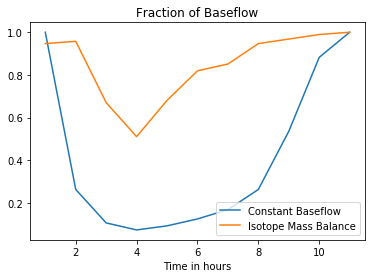

In [22]:
isotopes = isotopes.rename(columns = {'FBW ':'Constant Baseflow', 'FBW .1':'Isotope Mass Balance'})
isotopes.plot(x = 't', y = ['Constant Baseflow', 'Isotope Mass Balance'])
plt.title("Fraction of Baseflow")
plt.xlabel('Time in hours')